In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet tensorflow streamlit SQLAlchemy xgboost


   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------------------- ------------------- 1.0/2.1 MB 6.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 4.2 MB/s eta 0:00:00


In [3]:
!pip install prophet


In [2]:
!pip install prophet


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Updated import
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from xgboost import XGBRegressor
import streamlit as st


c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd

# Use the correct paths to your CSV files
df_1 = pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\Transactional_data_retail_01.csv")
df_2 = pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\Transactional_data_retail_02.csv")
customer_data = pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\CustomerDemographics.csv")
product_info = pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\ProductInfo.csv")



In [5]:
import pandas as pd

# Load the CSV files into dataframes
df_1 = pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\Transactional_data_retail_01.csv")
df_2 = pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\Transactional_data_retail_02.csv")

# Combine the two dataframes into one
transaction_data = pd.concat([df_1, df_2])

# Now you can access the columns
print(transaction_data.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'Customer ID',
       'InvoiceDate'],
      dtype='object')


In [6]:
print(df_1.columns)
print(df_2.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'Customer ID',
       'InvoiceDate'],
      dtype='object')
Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'Customer ID',
       'InvoiceDate'],
      dtype='object')


In [7]:
# Print columns of transaction_data
print("Transaction Data Columns:")
print(transaction_data.columns)

# Print columns of customer_data
print("Customer Data Columns:")
print(customer_data.columns)


Transaction Data Columns:
Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'Customer ID',
       'InvoiceDate'],
      dtype='object')
Customer Data Columns:
Index(['Customer ID', 'Country'], dtype='object')


In [8]:
# Clean column names in both DataFrames
transaction_data.columns = transaction_data.columns.str.strip()
customer_data.columns = customer_data.columns.str.strip()


In [9]:
import pandas as pd

# Concatenate transaction data
transaction_data = pd.concat([df_1, df_2], axis=0)

# Rename columns for consistency
transaction_data.rename(columns={'Customer ID': 'customer_id'}, inplace=True)
customer_data.rename(columns={'Customer ID': 'customer_id'}, inplace=True)

# Check if 'InvoiceDate' exists before converting
if 'InvoiceDate' in transaction_data.columns:
    # Specify the format of the date explicitly
    transaction_data['transaction_date'] = pd.to_datetime(transaction_data['InvoiceDate'], format='%d-%m-%Y', errors='coerce')
else:
    print("Error: 'InvoiceDate' column not found in transaction_data.")

# Clean column names to avoid spaces
transaction_data.columns = transaction_data.columns.str.strip()
customer_data.columns = customer_data.columns.str.strip()

# Check for 'customer_id' before merging
if 'customer_id' in transaction_data.columns and 'customer_id' in customer_data.columns:
    full_data = pd.merge(transaction_data, customer_data, on='customer_id', how='left')
else:
    print("Error: 'customer_id' column not found in one of the DataFrames.")

# Proceed with merging product information
if 'product_id' in full_data.columns and 'product_id' in product_info.columns:
    full_data = pd.merge(full_data, product_info, on='product_id', how='left')
else:
    print("Error: 'product_id' column not found in one of the DataFrames.")

# Fill any missing values with 0
full_data.fillna(0, inplace=True)

# Calculate total sales only if both columns exist
if 'Quantity' in full_data.columns and 'Price' in full_data.columns:
    full_data['total_sales'] = full_data['Quantity'] * full_data['Price']
else:
    print("Error: 'Quantity' or 'Price' columns not found in full_data.")

# Display the first few rows of the processed data
print(full_data.head())


Error: 'product_id' column not found in one of the DataFrames.


C:\Users\satya\AppData\Local\Temp\ipykernel_6716\337198386.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  full_data.fillna(0, inplace=True)


  Invoice StockCode  Quantity  Price  customer_id       InvoiceDate  \
0  489434     85048        12   6.95      13085.0  01 December 2021   
1  489434    79323P        12   6.75      13085.0  01 December 2021   
2  489434    79323W        12   6.75      13085.0  01 December 2021   
3  489434     22041        48   2.10      13085.0  01 December 2021   
4  489434     21232        24   1.25      13085.0  01 December 2021   

  transaction_date         Country  total_sales  
0                0  United Kingdom         83.4  
1                0  United Kingdom         81.0  
2                0  United Kingdom         81.0  
3                0  United Kingdom        100.8  
4                0  United Kingdom         30.0  


In [10]:
# Check the columns of full_data to ensure 'product_id' exists
print(full_data.columns)

# If 'product_id' is not found, check the product_info DataFrame
print(product_info.columns)

# If needed, rename columns for consistency
if 'Product ID' in full_data.columns:
    full_data.rename(columns={'Product ID': 'product_id'}, inplace=True)

# Perform the group by operation again if the column is now present
if 'product_id' in full_data.columns:
    weekly_sales = full_data.groupby([pd.Grouper(key='transaction_date', freq='W'), 'product_id'])['total_sales'].sum().reset_index()
    print(weekly_sales.head())
else:
    print("Error: 'product_id' column not found in full_data.")


Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'customer_id',
       'InvoiceDate', 'transaction_date', 'Country', 'total_sales'],
      dtype='object')
Index(['StockCode', 'Description'], dtype='object')
Error: 'product_id' column not found in full_data.


In [11]:
import pandas as pd

# Ensure the 'transaction_date' column is of datetime type
full_data['transaction_date'] = pd.to_datetime(full_data['transaction_date'], errors='coerce')

# Group by week and customer_id, then sum the total sales
weekly_sales = full_data.groupby([pd.Grouper(key='transaction_date', freq='W'), 'customer_id'])['total_sales'].sum().reset_index()

print(weekly_sales)



      transaction_date  customer_id  total_sales
0           1970-01-04          0.0   1191276.06
1           1970-01-04      12346.0       -64.68
2           1970-01-04      12347.0      1323.32
3           1970-01-04      12348.0       222.16
4           1970-01-04      12349.0      2646.99
...                ...          ...          ...
22142       2023-12-10      18225.0       330.28
22143       2023-12-10      18237.0       125.75
22144       2023-12-10      18272.0       367.88
22145       2023-12-10      18273.0        51.00
22146       2023-12-10      18283.0       208.00

[22147 rows x 3 columns]


In [12]:
print(customer_data.describe())
print(product_info.describe())
print(transaction_data.describe())


        customer_id
count     49.000000
mean   15299.020408
std     1932.264803
min    12362.000000
25%    13705.000000
50%    15311.000000
75%    17511.000000
max    18102.000000
       StockCode Description
count       8818        6367
unique      5152        5697
top        20713       check
freq           9         146
           Quantity         Price    customer_id  \
count  1.067371e+06  1.067371e+06  824364.000000   
mean   9.938898e+00  4.649388e+00   15324.638504   
min   -8.099500e+04 -5.359436e+04   12346.000000   
25%    1.000000e+00  1.250000e+00   13975.000000   
50%    3.000000e+00  2.100000e+00   15255.000000   
75%    1.000000e+01  4.150000e+00   16797.000000   
max    8.099500e+04  3.897000e+04   18287.000000   
std    1.727058e+02  1.235531e+02    1697.464450   

                    transaction_date  
count                         541910  
mean   2023-07-04 00:00:38.264657152  
min              2022-12-01 00:00:00  
25%              2023-03-28 00:00:00  
50%        

c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

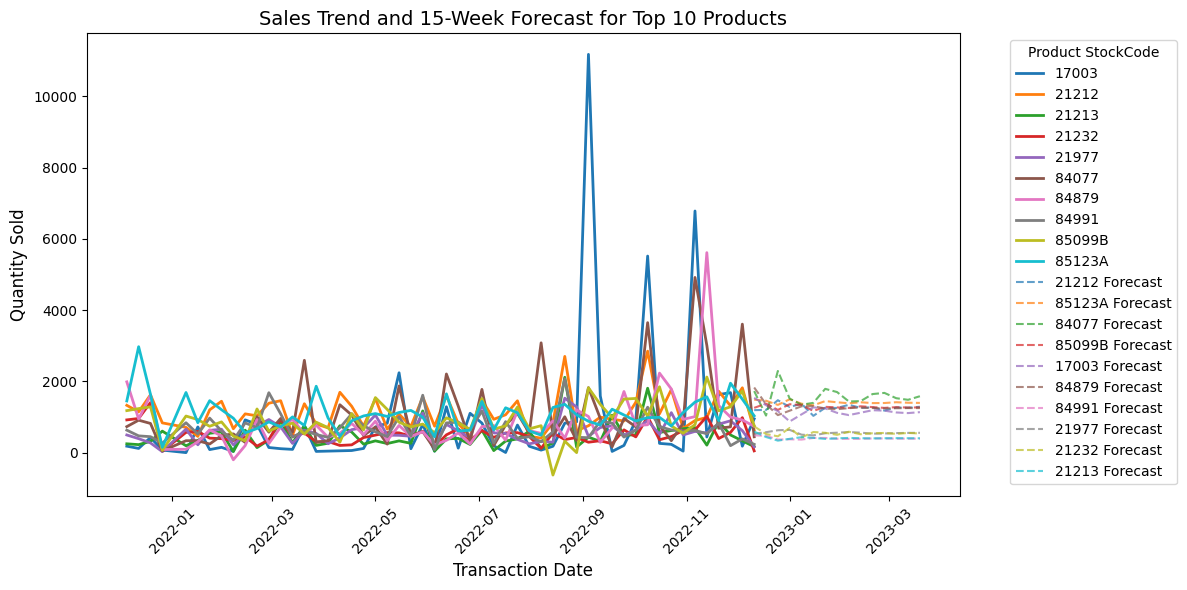

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your data (replace with the actual path)
full_data = pd.concat([
    pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\Transactional_data_retail_01.csv"),
    pd.read_csv(r"C:\Users\satya\Downloads\Usecase_DemadForecasting1\Transactional_data_retail_02.csv")
])

# Ensure InvoiceDate is in datetime format
full_data['InvoiceDate'] = pd.to_datetime(full_data['InvoiceDate'], dayfirst=True, errors='coerce')

# Drop rows where the InvoiceDate could not be converted
full_data = full_data.dropna(subset=['InvoiceDate'])

# Filter data for the range December 2021 to December 2023
start_date = '2021-12-01'
end_date = '2023-12-31'
filtered_data = full_data[(full_data['InvoiceDate'] >= start_date) & (full_data['InvoiceDate'] <= end_date)]

# Get the top 10 products based on quantity sold within the filtered date range
top_10_products = filtered_data.groupby('StockCode')['Quantity'].sum().nlargest(10).index

# Filter the data for the top 10 products
top_10_data = filtered_data[filtered_data['StockCode'].isin(top_10_products)]

# Resample weekly sales data for each product
top_10_data.set_index('InvoiceDate', inplace=True)
weekly_sales = top_10_data.groupby([pd.Grouper(freq='W'), 'StockCode'])['Quantity'].sum().reset_index()

# Forecast for the next 15 weeks using ARIMA for each of the top 10 products
forecasts = {}
for product in top_10_products:
    product_data = weekly_sales[weekly_sales['StockCode'] == product].set_index('InvoiceDate')['Quantity']
    model = ARIMA(product_data, order=(5, 1, 0))  # ARIMA(p, d, q) model
    model_fit = model.fit()
    
    # Forecast next 15 weeks
    forecast = model_fit.forecast(steps=15)
    forecasts[product] = forecast

# Visualize sales trends for the top 10 products (Historical Data)
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='InvoiceDate', y='Quantity', hue='StockCode', linewidth=2)

# Plot forecasted values (Forecast Data)
for product, forecast in forecasts.items():
    # Ensure the future dates align correctly
    future_dates = pd.date_range(start=weekly_sales['InvoiceDate'].max(), periods=15, freq='W')
    plt.plot(future_dates, forecast, '--', label=f"{product} Forecast", alpha=0.7)

# Improve the title and labels
plt.title('Sales Trend and 15-Week Forecast for Top 10 Products', fontsize=14)
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend with better placement and title
plt.legend(title='Product StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


21:32:10 - cmdstanpy - INFO - Chain [1] start processing
21:32:11 - cmdstanpy - INFO - Chain [1] done processing


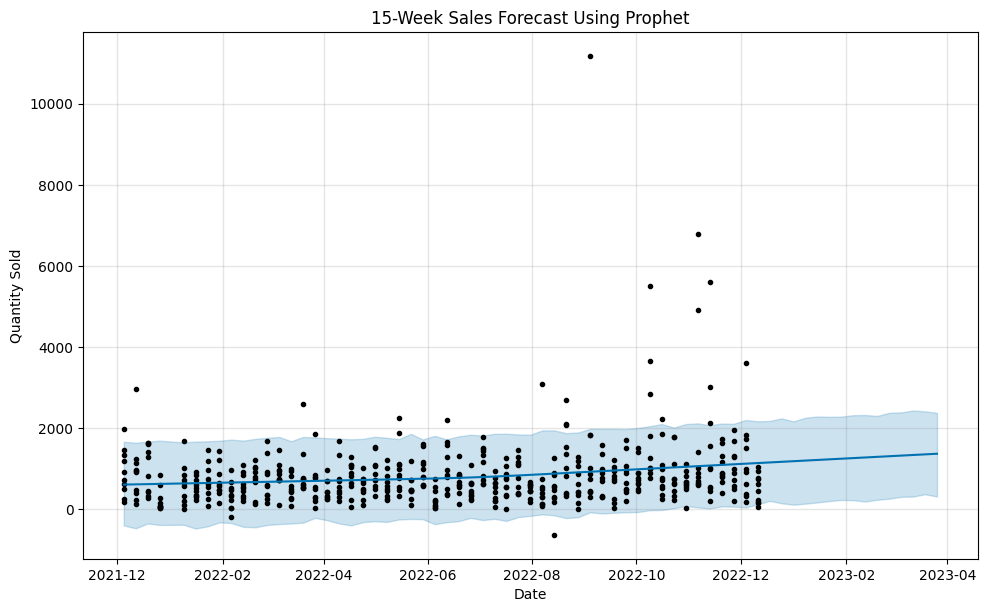

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Assuming weekly_sales is already defined
# Structure the data for Prophet (ensure 'InvoiceDate' and 'Quantity' columns exist)
prophet_data = weekly_sales[['InvoiceDate', 'Quantity']].rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})

# Initialize the Prophet model
m = Prophet()

# Fit the model to the data
m.fit(prophet_data)

# Create a future DataFrame for the next 15 weeks
future = m.make_future_dataframe(periods=15, freq='W')

# Generate the forecast
forecast = m.predict(future)

# Plot the forecast
m.plot(forecast)
plt.title('15-Week Sales Forecast Using Prophet')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()


In [86]:
print(weekly_sales.columns)


Index(['InvoiceDate', 'StockCode', 'Quantity'], dtype='object')


In [87]:
# Calculate total revenue for each transaction
filtered_data['Revenue'] = filtered_data['Quantity'] * filtered_data['Price']

# Group by StockCode and sum the revenue
revenue_per_product = filtered_data.groupby('StockCode')['Revenue'].sum()

# Get the top 10 products by revenue
top_10_revenue_products = revenue_per_product.nlargest(10)

print("Top 10 Products by Revenue:")
print(top_10_revenue_products)


Top 10 Products by Revenue:
StockCode
22423     163051.46
85123A    155825.52
DOT       116401.99
85099B     88922.48
84879      72454.12
22086      57870.20
47566      49645.52
84347      47672.49
POST       46092.36
21843      42333.85
Name: Revenue, dtype: float64


In [95]:
# from statsmodels.tsa.arima.model import ARIMA

# Example for one of the top products
for product in top_10_revenue_products.index:
    # Filter the data for this product
    product_data = weekly_sales[weekly_sales['StockCode'] == product].set_index('InvoiceDate')['Quantity']
    
    # Check if the data is empty
    if product_data.empty:
        print(f"No data available for product {product}")
        continue  # Skip to the next product in the loop
    
    # Fit ARIMA model if sufficient data exists
    if len(product_data) >= 5:  # Ensure enough data points
        try:
            model_arima = ARIMA(product_data, order=(5, 1, 0))
            model_fit_arima = model_arima.fit()
            
            # Forecast the next 15 weeks
            arima_forecast = model_fit_arima.forecast(steps=15)
            print(f"ARIMA Forecast for {product}:")
            print(arima_forecast)
        except ValueError as e:
            print(f"Error fitting ARIMA for {product}: {e}")
    else:
        print(f"Not enough data for product {product}")


No data available for product 22423


c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast for 85123A:
53    1488.619939
54    1457.660364
55    1341.049689
56    1498.287882
57    1374.314448
58    1328.884425
59    1447.633602
60    1414.595882
61    1385.623003
62    1414.577007
63    1391.153566
64    1393.461991
65    1415.668059
66    1401.172661
67    1396.495041
Name: predicted_mean, dtype: float64
No data available for product DOT
ARIMA Forecast for 85099B:
53    1257.604572
54    1377.070501
55    1200.435741
56    1359.261915
57    1337.908361
58    1172.190818
59    1286.226292
60    1269.645774
61    1255.008155
62    1301.929805
63    1278.299375
64    1256.953607
65    1277.042179
66    1266.101782
67    1269.476468
Name: predicted_mean, dtype: float64
ARIMA Forecast for 84879:
53    1828.744658
54    1359.758990
55    1053.852819
56    1178.321954
57    1300.822625
58    1305.162208
59    1237.860775
60    1218.618937
61    1250.626307
62    1264.219858
63    1252.631726
64    1243.961404
65    1247.235422
66    1252.158766
67    1251.678391
Na

c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no asso

22:20:39 - cmdstanpy - INFO - Chain [1] start processing
22:20:39 - cmdstanpy - INFO - Chain [1] done processing


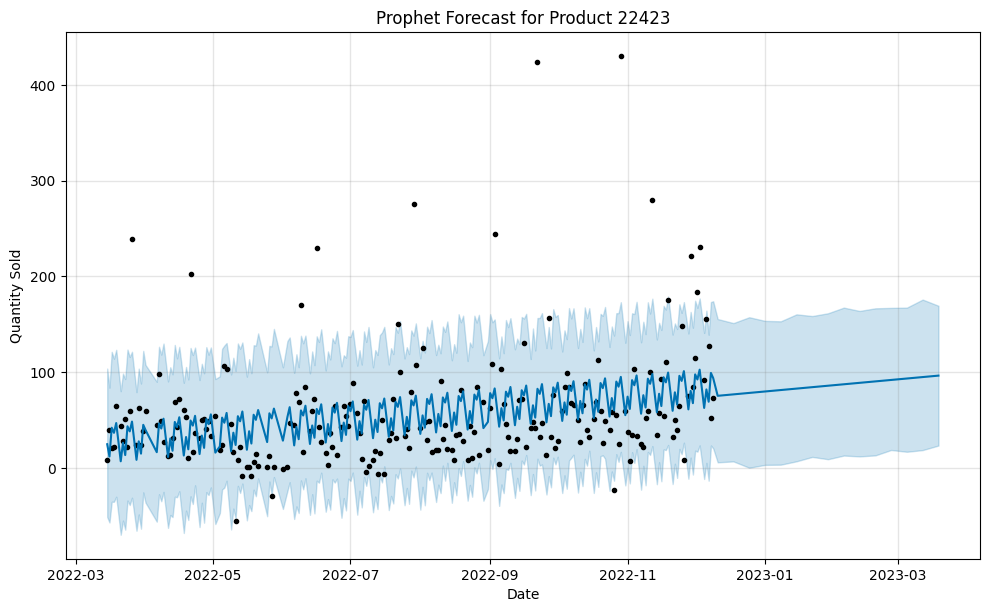

22:20:40 - cmdstanpy - INFO - Chain [1] start processing
22:20:40 - cmdstanpy - INFO - Chain [1] done processing


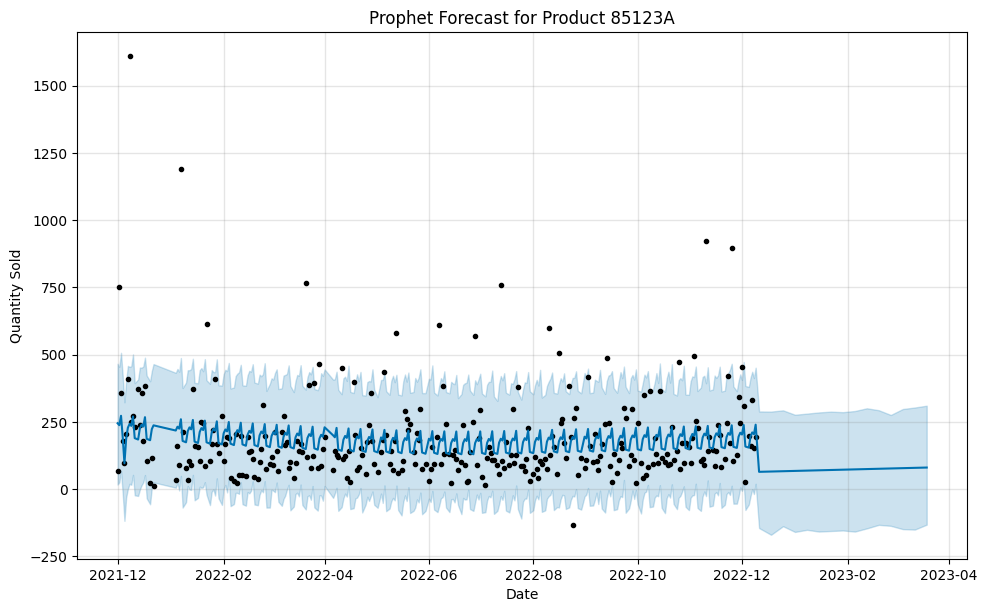

22:20:40 - cmdstanpy - INFO - Chain [1] start processing
22:20:40 - cmdstanpy - INFO - Chain [1] done processing


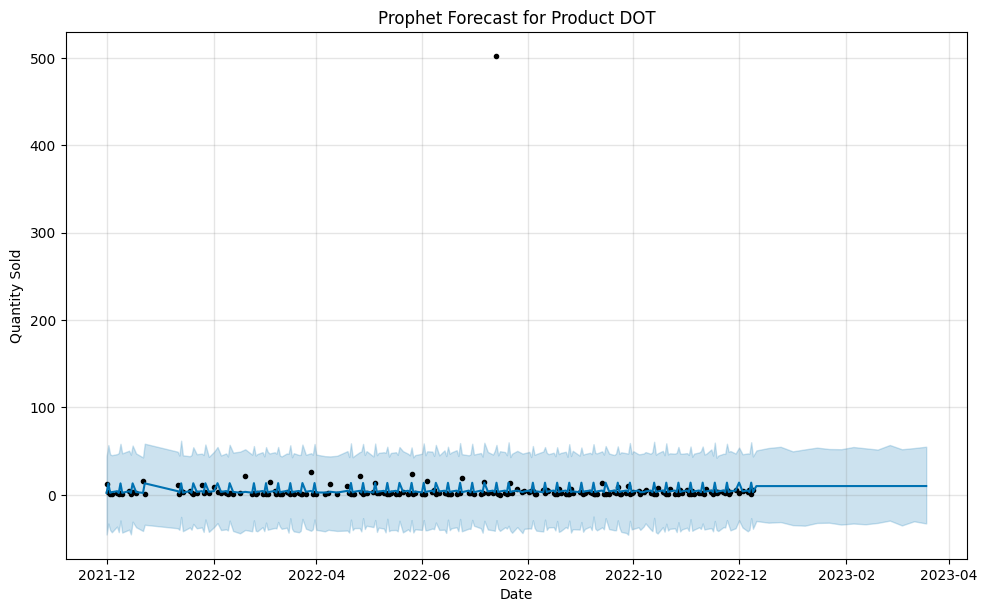

22:20:41 - cmdstanpy - INFO - Chain [1] start processing
22:20:41 - cmdstanpy - INFO - Chain [1] done processing


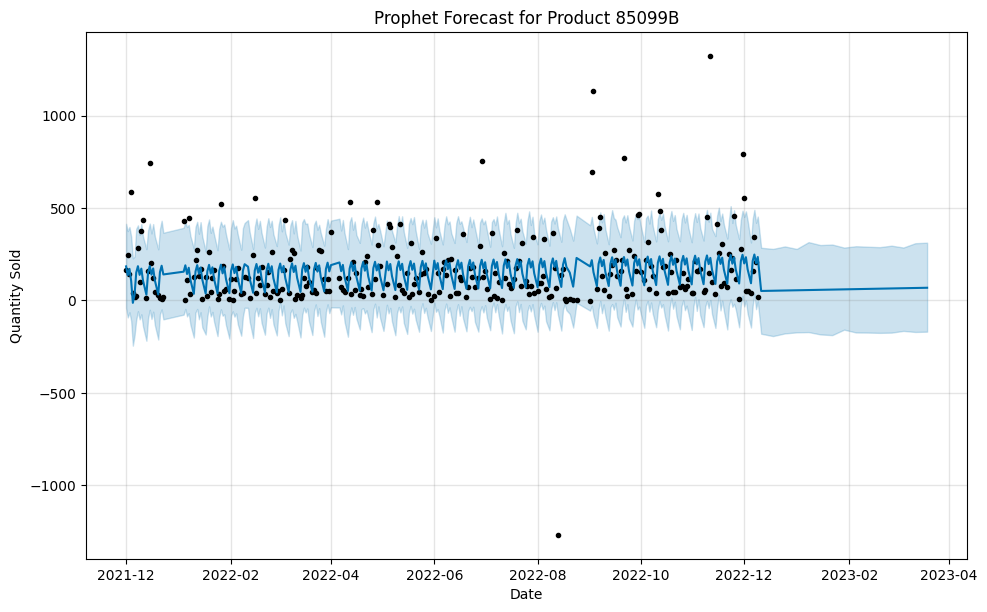

22:20:42 - cmdstanpy - INFO - Chain [1] start processing
22:20:42 - cmdstanpy - INFO - Chain [1] done processing


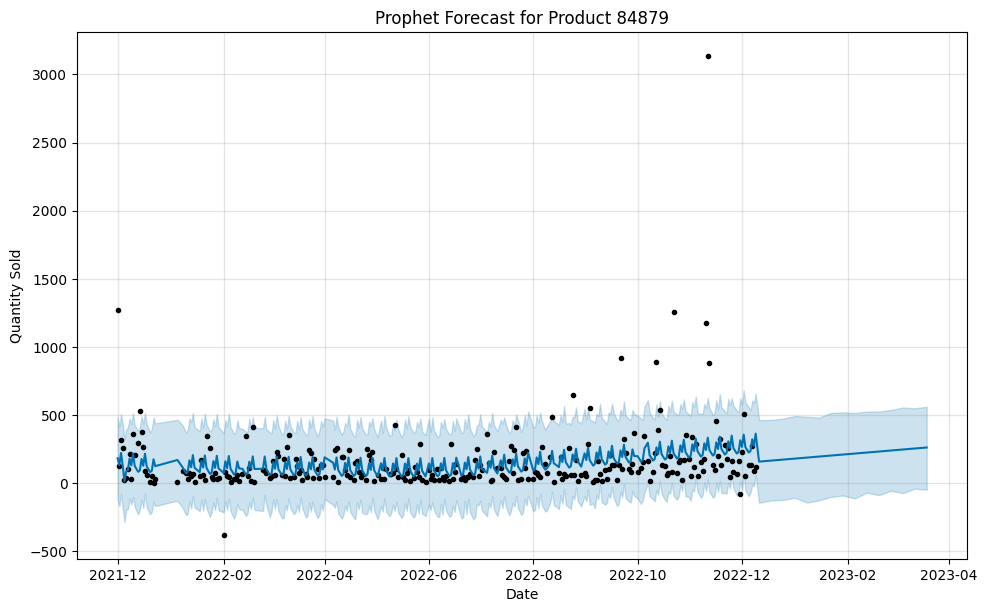

22:20:42 - cmdstanpy - INFO - Chain [1] start processing
22:20:42 - cmdstanpy - INFO - Chain [1] done processing


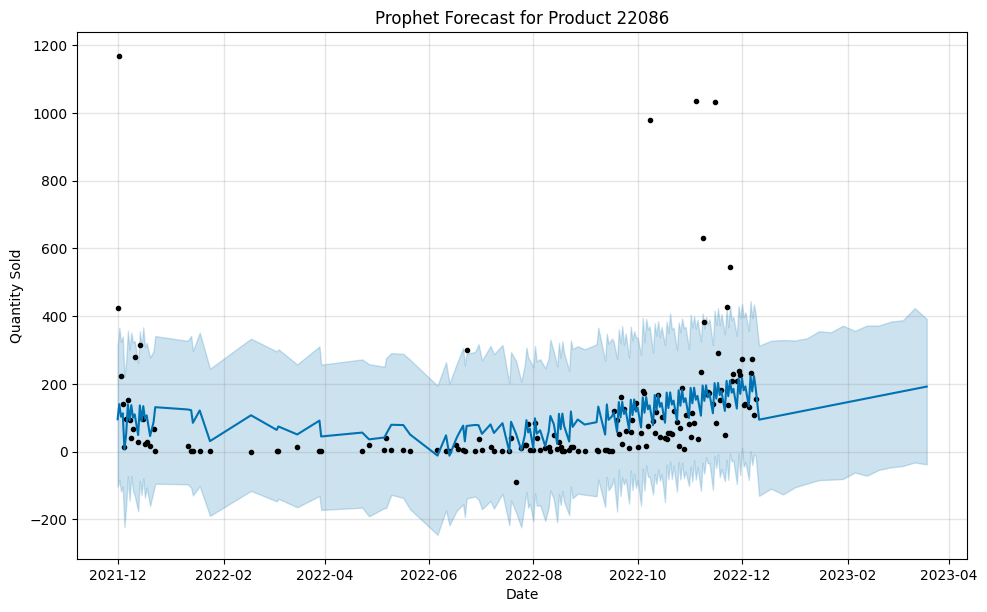

22:20:43 - cmdstanpy - INFO - Chain [1] start processing
22:20:43 - cmdstanpy - INFO - Chain [1] done processing


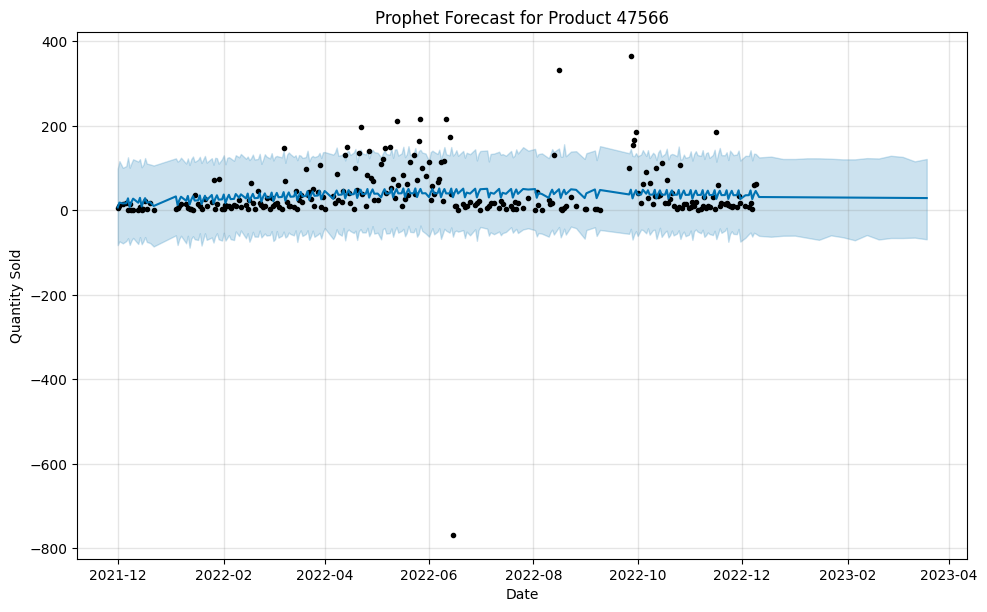

22:20:43 - cmdstanpy - INFO - Chain [1] start processing
22:20:44 - cmdstanpy - INFO - Chain [1] done processing


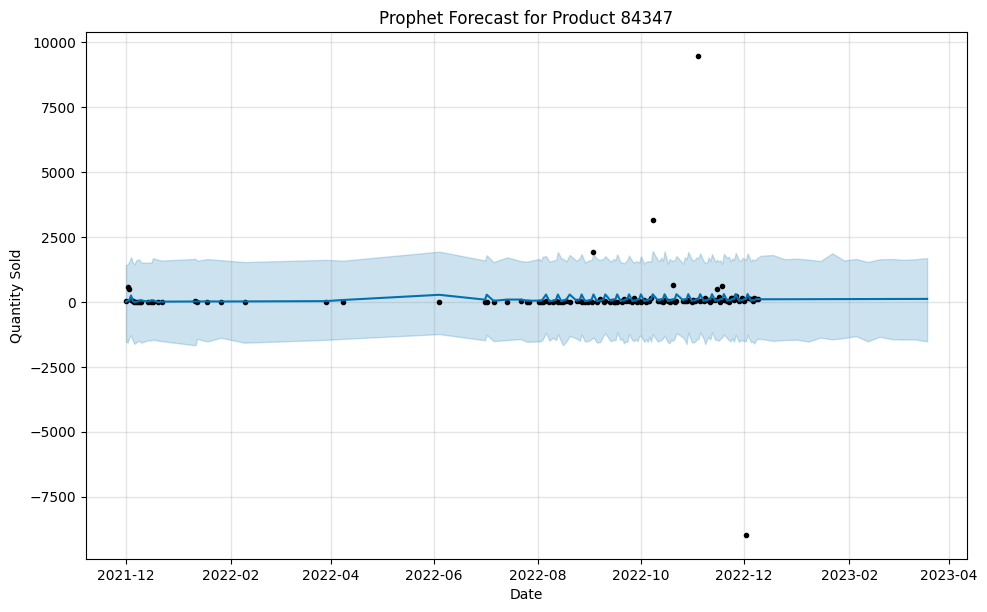

22:20:44 - cmdstanpy - INFO - Chain [1] start processing
22:20:44 - cmdstanpy - INFO - Chain [1] done processing


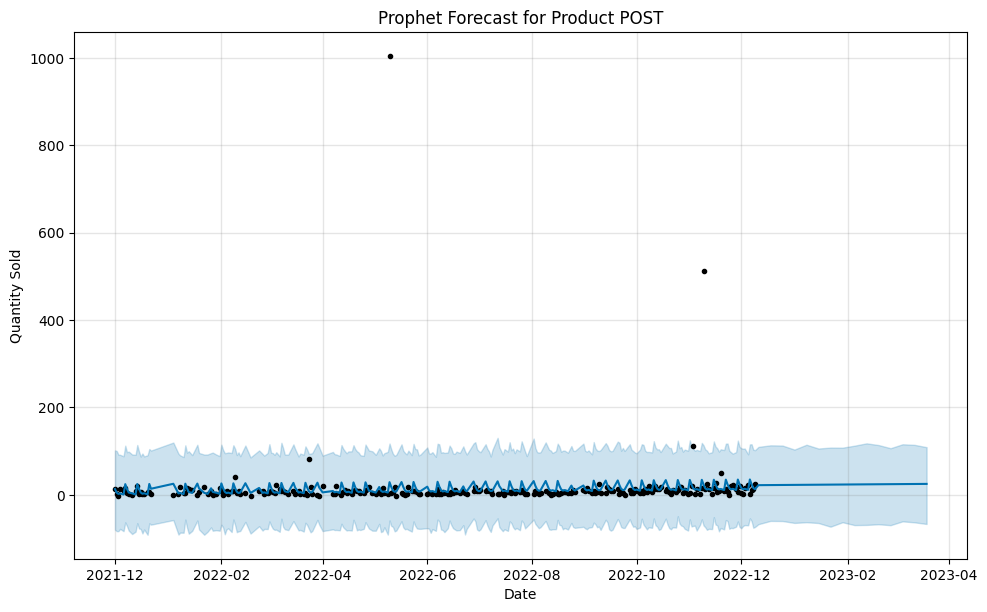

22:20:45 - cmdstanpy - INFO - Chain [1] start processing
22:20:45 - cmdstanpy - INFO - Chain [1] done processing


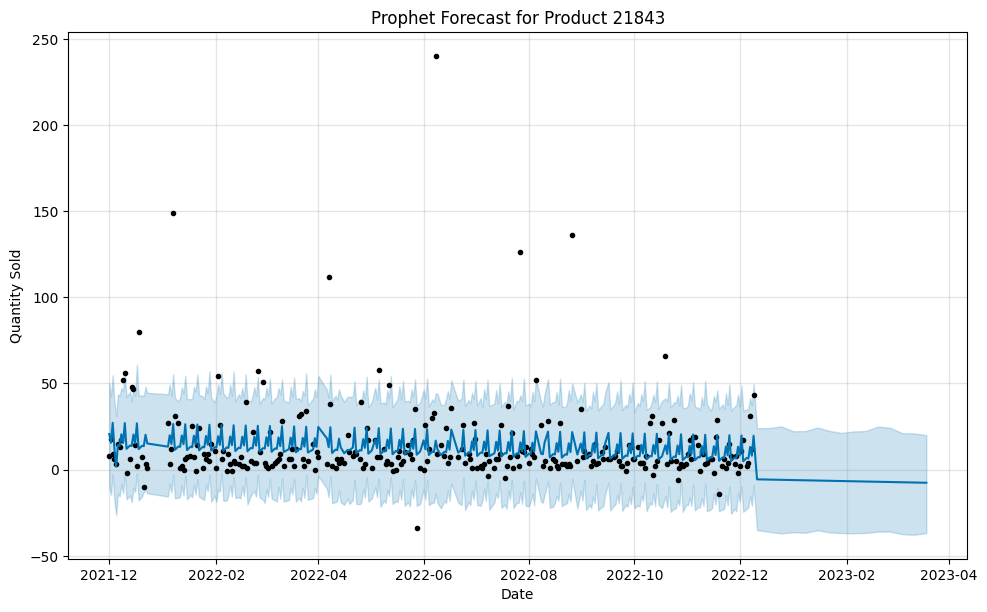

In [97]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Forecast for top products using Prophet
for product in top_10_revenue_products.index:
    product_data = filtered_data[filtered_data['StockCode'] == product].groupby('InvoiceDate')['Quantity'].sum().reset_index()

    # Prepare the data for Prophet
    prophet_data = product_data.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})
    
    # Fit Prophet model
    m = Prophet()
    m.fit(prophet_data)
    
    # Create a future DataFrame for the next 15 weeks
    future = m.make_future_dataframe(periods=15, freq='W')
    
    # Predict the future sales
    forecast = m.predict(future)
    
    # Plot the forecast
    fig = m.plot(forecast)
    plt.title(f"Prophet Forecast for Product {product}")
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.show()


In [15]:
print(full_data.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'Price', 'customer_id',
       'InvoiceDate', 'transaction_date', 'Country', 'total_sales'],
      dtype='object')


In [16]:
# Selecting the correct columns for the model
X = full_data[['Quantity', 'Price']]  # Adjusting based on available columns
y = full_data['total_sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 3.397762862701265


In [98]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate models here


In [100]:
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")


y_test length: 177895
y_pred length: 213475


In [101]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example data preparation
X = filtered_data[['Price', 'Customer ID']]  # Ensure all features are consistent
y = filtered_data['Quantity']

# Train-test split with consistent sizing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on X_test
y_pred = model.predict(X_test)

# Ensure sizes match
print(f"y_test length: {len(y_test)}, y_pred length: {len(y_pred)}")

# Calculate RMSE and MAE only if lengths match
if len(y_test) == len(y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"RMSE: {rmse}, MAE: {mae}")
else:
    print("Error: Lengths of y_test and y_pred do not match.")


y_test length: 105093, y_pred length: 105093
RMSE: 93.97277596054332, MAE: 10.039447347716496


c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Selecting the correct columns for the model
X = full_data[['Quantity', 'Price']]  # Adjusting based on available columns
y = full_data['total_sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Predictions using the correct model variable
y_pred = xgb.predict(X_test)

# Evaluate the model
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


MAE: 3.397762862701265
RMSE: 195.23729093200492


c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test are actual values and y_pred are predicted values
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 195.23729093200492
MAE: 3.397762862701265


c:\Users\satya\anaconda3\envs\demand_forecasting\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
print(filtered_data['StockCode'].unique())  # Check available StockCodes


['85048' '79323P' '79323W' ... '22935' '22933' '21120']


Number of rows for selected product 85048: 319


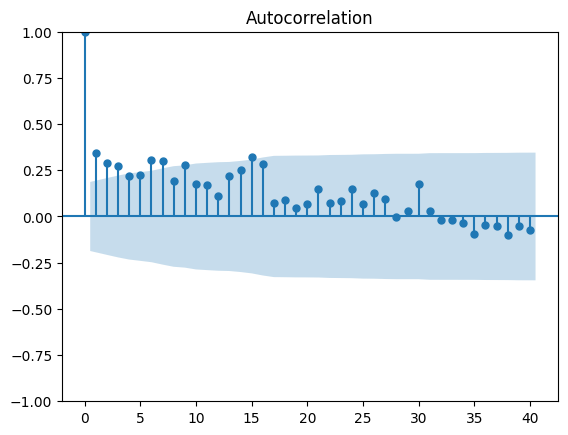

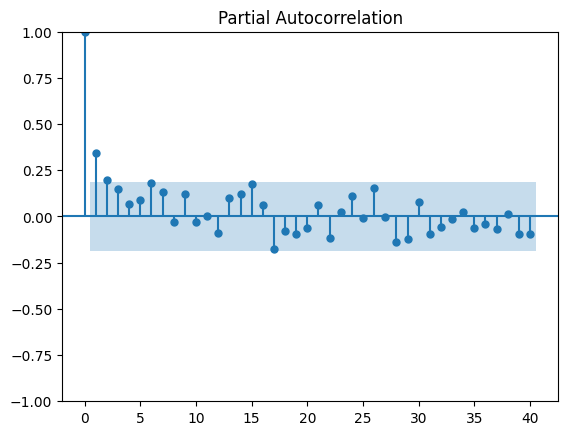

In [105]:
import pandas as pd

# Select a valid StockCode, e.g., '85048'
selected_product = '85048'

# Check if the product exists in the dataset after filtering
product_data_check = filtered_data[filtered_data['StockCode'] == selected_product]

# Print the number of rows for the selected product
print(f"Number of rows for selected product {selected_product}: {len(product_data_check)}")

# If the product exists, proceed with grouping and analysis
if len(product_data_check) > 0:
    # Group by InvoiceDate and sum the quantities
    product_data = product_data_check.groupby('InvoiceDate')['Quantity'].sum()
    
    # Check if there are enough data points for ACF/PACF
    if len(product_data) > 10:  # Ensure a minimum number of observations
        from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
        import matplotlib.pyplot as plt
        
        # Plot ACF and PACF with limited lags
        plot_acf(product_data, lags=40)
        plot_pacf(product_data, lags=40)
        plt.show()
    else:
        print(f"Not enough data points for ACF/PACF plotting for product {selected_product}.")
else:
    print(f"The selected product {selected_product} does not exist in the dataset.")


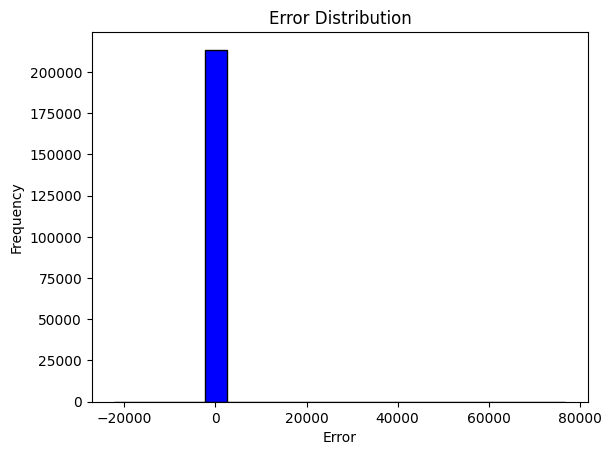

In [49]:
# Plot error histogram
import matplotlib.pyplot as plt

# Calculate the errors
errors = y_test - y_pred

# Plot the error distribution
plt.hist(errors, bins=20, color='blue', edgecolor='black')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


In [106]:
import streamlit as st

# Streamlit App Example
st.title("Demand Forecasting App")

# Select product from top 10 products
selected_product = st.selectbox("Select Product", top_10_revenue_products.index)

# Display forecast plot for selected product
if selected_product:
    # Use Prophet or any other model to forecast
    st.line_chart(forecast['yhat'])


2024-10-04 22:25:25.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 22:25:25.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [109]:
pip install streamlit
